<a href="https://colab.research.google.com/github/codexsabir/userbase-regression-model/blob/main/CustomerEngaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

In [6]:
customers = pd.read_csv('./Ecommerce Customers.csv')

In [7]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


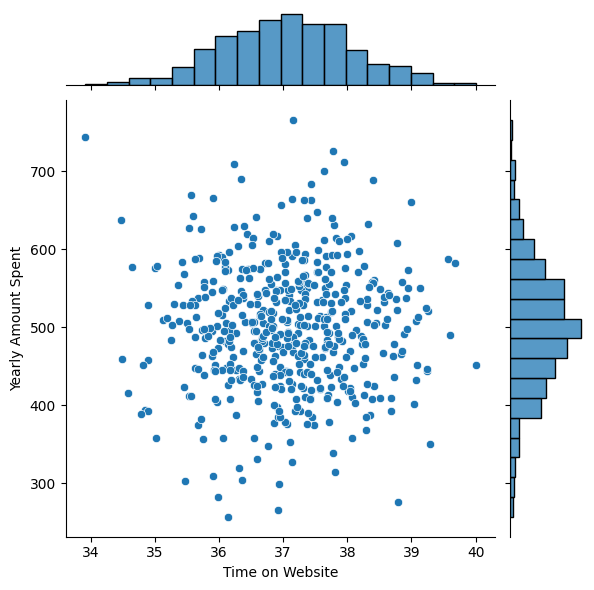

In [12]:
sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent')

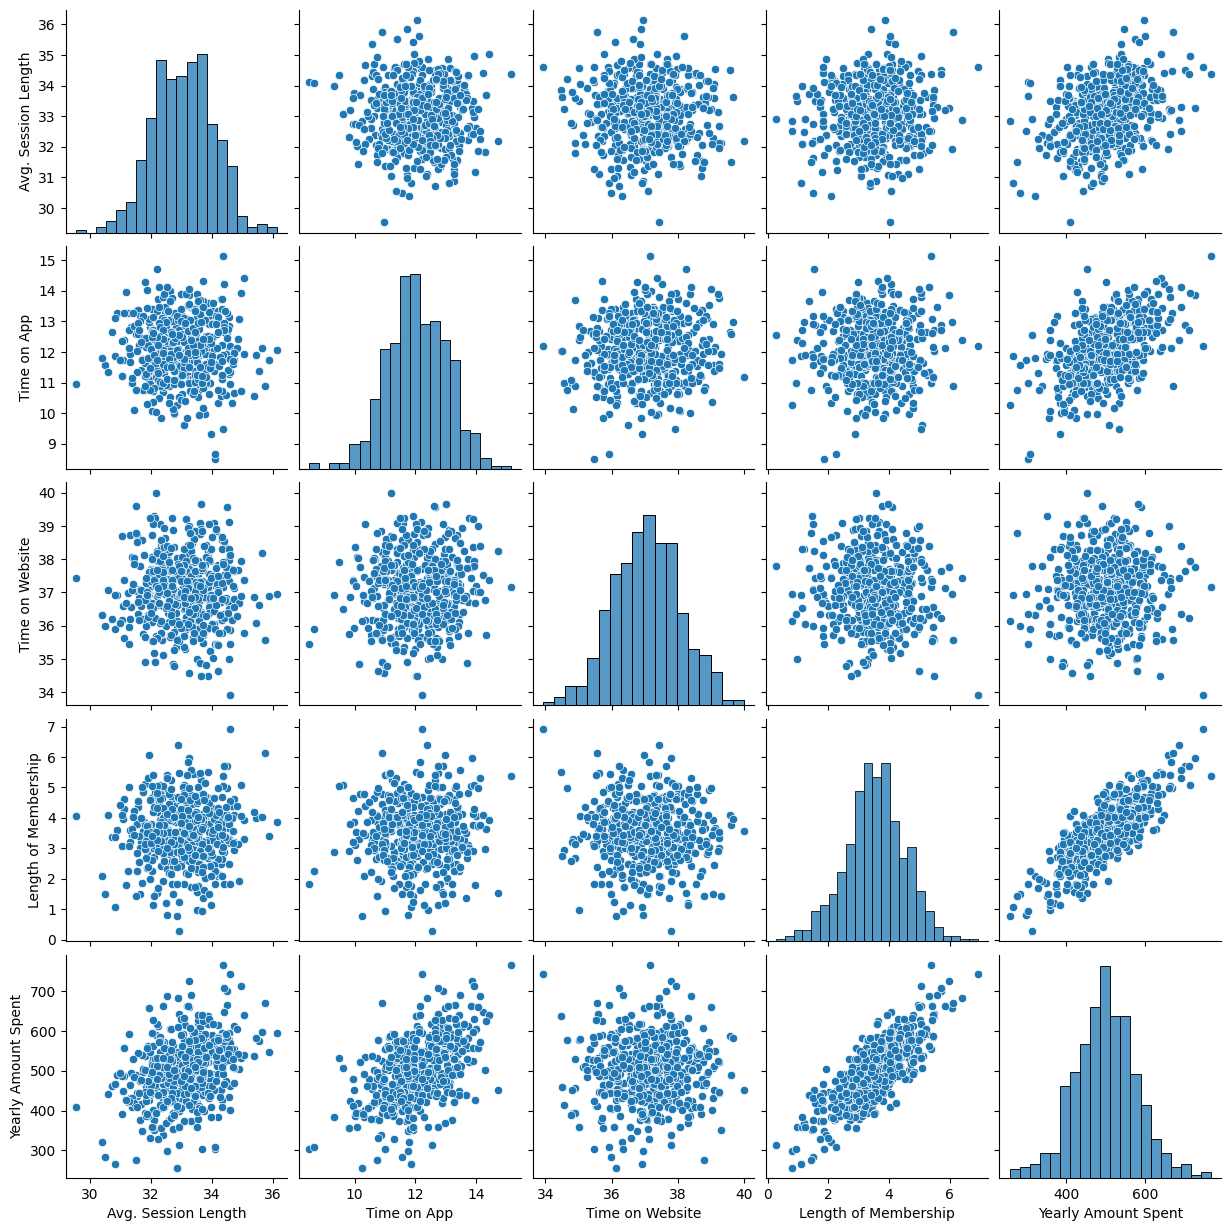

In [13]:
sns.pairplot(data=customers)

In [14]:
# length of membership

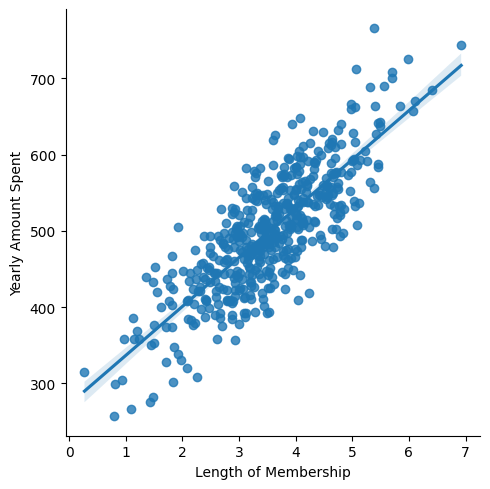

In [16]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [20]:
  customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [19]:
y= customers['Yearly Amount Spent']

In [21]:
X= customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test , y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

In [27]:
lm.fit(X_train,y_train)

LinearRegression()

In [28]:
lm.coef_

array([25.91225933, 38.50812563,  0.28871629, 61.16161032])

In [29]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

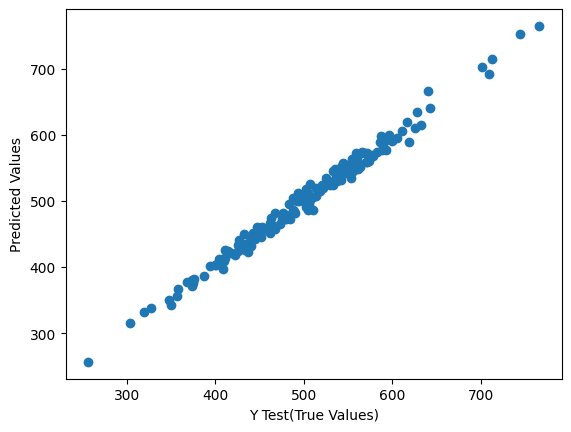

In [30]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')

In [31]:
from sklearn import metrics

In [36]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 7.294546588331307
MSE 81.90726984520914
RMSE 9.0502635235229


In [37]:
metrics.explained_variance_score(y_test,predictions)

0.988218935704259

In [38]:
# Lets see every thing was ok with our model or not

/tmp/ipython-input-40-3491059997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

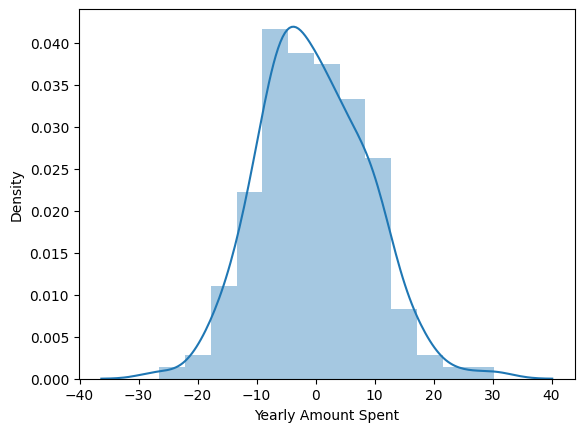

In [40]:
sns.distplot((y_test-predictions))

In [42]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Avg. Session Length,25.912259
Time on App,38.508126
Time on Website,0.288716
Length of Membership,61.161610
